# Plot Periodic Hill Results

In [1]:
%%capture
import sys
import os
sys.path.insert(1, '../utilities')
import utilities
import plotter
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

In [2]:
figsize=(15,6)
legend_elements = []

# Setup directories
# Reference data
refdir = os.path.abspath("../refdata")
edir = os.path.join(refdir, "exp")
ldir = os.path.join(refdir, "les")
edf   = plotter.read_exp_data(edir)
ldf   = plotter.read_les_data(ldir)
v2fdf = plotter.read_cdp_data(os.path.join(refdir, "cdp-v2f"))
tamsdf = plotter.read_cdp_data(os.path.join(refdir, "cdp-tams"))

# Exp.
legend_elements += [
        Line2D(
            [0],
            [0],
            lw=0,
            marker=plotter.markertype[2],
            color=plotter.cmap[-1],
            mfc=plotter.cmap[-1],
            mec=plotter.cmap[-1],
            markersize=3,
            label="Exp.",
        ),
    ]

x = np.linspace(0,9,1001)
fdirlist=[""]

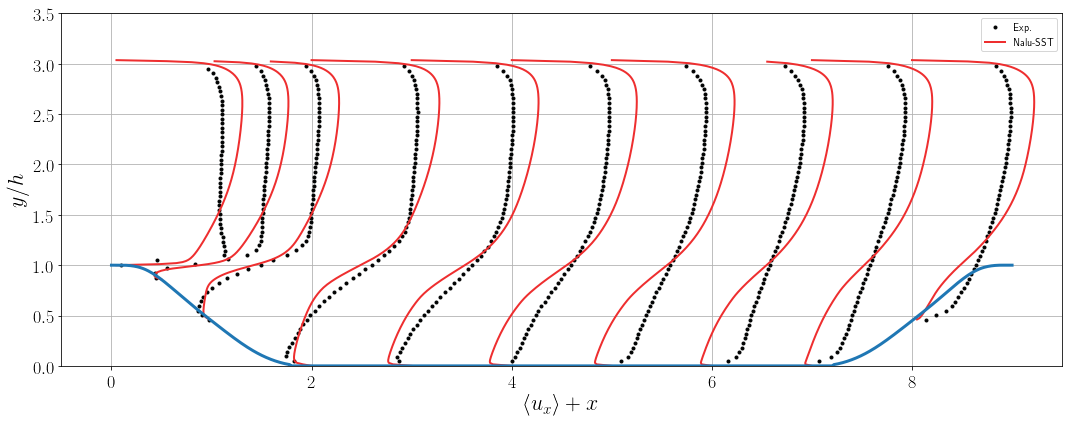

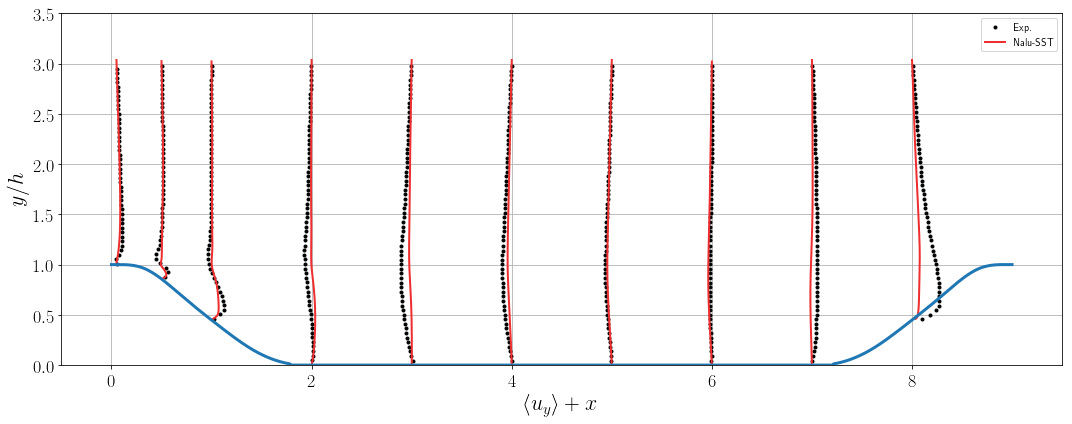

In [3]:
grouped = edf.groupby(["x"])
for k, (name, group) in enumerate(grouped):
    idx = group.y.values >= utilities.hill(group.x.values)
    plt.figure("u", figsize=figsize)
    p = plt.plot(group[idx].u + group[idx].x, group[idx].y, 
                 lw=0, color=plotter.cmap[-1], marker=plotter.markertype[2], mec=plotter.cmap[-1], mfc=plotter.cmap[-1], ms=3, )

    plt.figure("v", figsize=figsize)
    p = plt.plot(group[idx].v + group[idx].x, group[idx].y,
                 lw=0, color=plotter.cmap[-1], marker=plotter.markertype[2], mec=plotter.cmap[-1], mfc=plotter.cmap[-1], ms=3,)

# Nalu data
for i, fdir in enumerate(fdirlist):
    yname = os.path.join(os.path.dirname(fdir), "periodicHill_sst.yaml")
    u0, rho0, mu, turb_model = plotter.parse_ic(yname)
    model = turb_model.upper().replace("_", "-")
    legend_elements += [ Line2D([0], [0], lw=2, color=plotter.cmap[i], label=f"Nalu-{model}") ]

    ndf = pd.read_csv(os.path.join(fdir, "profiles.dat"))
    ndf.loc[ndf.u > 5, ["u", "v", "w"]] = 0.0
    grouped = ndf.groupby(["x"])
    for k, (name, group) in enumerate(grouped):
        idx = group.y.values >= utilities.hill(group.x.values)
        plt.figure("u")
        p = plt.plot(group[idx].u + group[idx].x, group[idx].y, lw=2, color=plotter.cmap[i])

        plt.figure("v")
        p = plt.plot(group[idx].v + group[idx].x, group[idx].y, lw=2, color=plotter.cmap[i])

    
plt.figure("u")
ax = plt.gca()
plt.plot(x, utilities.hill(x), lw=3)
plt.xlabel(r"$\langle u_x \rangle + x$", fontsize=22, fontweight="bold")
plt.ylabel(r"$y / h$", fontsize=22, fontweight="bold")
plt.setp(ax.get_xmajorticklabels(), fontsize=18, fontweight="bold")
plt.setp(ax.get_ymajorticklabels(), fontsize=18, fontweight="bold")
plt.xlim([-0.5, 9.5])
plt.ylim([0, 3.5])
legend = ax.legend(handles=legend_elements, loc="best")
plt.grid()
plt.tight_layout()

plt.figure("v")
ax = plt.gca()
plt.plot(x, utilities.hill(x), lw=3)
plt.xlabel(r"$\langle u_y \rangle + x$", fontsize=22, fontweight="bold")
plt.ylabel(r"$y / h$", fontsize=22, fontweight="bold")
plt.setp(ax.get_xmajorticklabels(), fontsize=18, fontweight="bold")
plt.setp(ax.get_ymajorticklabels(), fontsize=18, fontweight="bold")
plt.xlim([-0.5, 9.5])
plt.ylim([0, 3.5])
legend = ax.legend(handles=legend_elements, loc="best")
plt.grid()
plt.tight_layout()

